# Microproyecto 4: CNN

### Integrantes:

* Leonard David Vivas Dallos
* Tomás Escobar Rivera
* Nicolás Orozco Medina

En este proyecto vamos a crear una Red Neuronal Convolucional (CNN) para clasificar imágenes del dataset FGVC Aircraft, que contiene diferentes tipos de aviones. Usaremos TensorFlow y Keras para construir, entrenar y evaluar el modelo.

El link del dataset es: https://www.kaggle.com/datasets/seryouxblaster764/fgvc-aircraft.

Enlace a los puntos 1-3: https://docs.google.com/document/d/1vn9TFkufur6jXtMROWpwrorTIG3lApJ3KCEPOVkTTI4/edit?usp=sharing

El link del drive donde estan las imagenes es: https://drive.google.com/drive/folders/1rzU1Woou-pOX_UU5sTlW8COCBdw3DwSs

## Importación Librerías


Como siempre lo primero es importar las librerías que necesitemos.

In [1]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 12.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import os
import random
from PIL import Image

from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import visualkeras

from tensorflow.keras.applications import ResNet50

## Preprocesamiento y Carga de los Datos

Tenemos una carpeta llamada images dónde están todas las imágenes que vamos a usar. A parte tenemos tres archivos csv: train, test y val. Además, contamos con una carpeta llamada data donde hay bastante información sobre el dataset.

Primero revisemos cuales son las familias de aviones que nos podemos encontrar en el dataset.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

ruta = '/content/drive/Shared drives/ia/fgvc-aircraft-2013b/'

# Definir la ruta del archivo
file_path = os.path.join(ruta, 'data/families.txt')

# Leer y imprimir el contenido del archivo
with open(file_path, 'r', encoding='utf-8') as file:
    content = file.read()
    print(content)

# Imprimir la cantidad de líneas del archivo
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()
    print("Cantidad total de Familias de Aviones: ", len(lines))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
A300
A310
A320
A330
A340
A380
ATR-42
ATR-72
An-12
BAE 146
BAE-125
Beechcraft 1900
Boeing 707
Boeing 717
Boeing 727
Boeing 737
Boeing 747
Boeing 757
Boeing 767
Boeing 777
C-130
C-47
CRJ-200
CRJ-700
Cessna 172
Cessna 208
Cessna Citation
Challenger 600
DC-10
DC-3
DC-6
DC-8
DC-9
DH-82
DHC-1
DHC-6
DR-400
Dash 8
Dornier 328
EMB-120
Embraer E-Jet
Embraer ERJ 145
Embraer Legacy 600
Eurofighter Typhoon
F-16
F/A-18
Falcon 2000
Falcon 900
Fokker 100
Fokker 50
Fokker 70
Global Express
Gulfstream
Hawk T1
Il-76
King Air
L-1011
MD-11
MD-80
MD-90
Metroliner
PA-28
SR-20
Saab 2000
Saab 340
Spitfire
Tornado
Tu-134
Tu-154
Yak-42

Cantidad total de Familias de Aviones:  70


Pero con todas las variantes las clases son:

In [8]:
# Definir la ruta del archivo
file_path = os.path.join(ruta, 'data/variants.txt')

# Leer y imprimir el contenido del archivo
with open(file_path, 'r', encoding='utf-8') as file:
    content = file.read()
    print(content)

# Imprimir la cantidad de líneas del archivo
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()
    print("Cantidad total de Variantes de Aviones: ", len(lines))

707-320
727-200
737-200
737-300
737-400
737-500
737-600
737-700
737-800
737-900
747-100
747-200
747-300
747-400
757-200
757-300
767-200
767-300
767-400
777-200
777-300
A300B4
A310
A318
A319
A320
A321
A330-200
A330-300
A340-200
A340-300
A340-500
A340-600
A380
ATR-42
ATR-72
An-12
BAE 146-200
BAE 146-300
BAE-125
Beechcraft 1900
Boeing 717
C-130
C-47
CRJ-200
CRJ-700
CRJ-900
Cessna 172
Cessna 208
Cessna 525
Cessna 560
Challenger 600
DC-10
DC-3
DC-6
DC-8
DC-9-30
DH-82
DHC-1
DHC-6
DHC-8-100
DHC-8-300
DR-400
Dornier 328
E-170
E-190
E-195
EMB-120
ERJ 135
ERJ 145
Embraer Legacy 600
Eurofighter Typhoon
F-16A/B
F/A-18
Falcon 2000
Falcon 900
Fokker 100
Fokker 50
Fokker 70
Global Express
Gulfstream IV
Gulfstream V
Hawk T1
Il-76
L-1011
MD-11
MD-80
MD-87
MD-90
Metroliner
Model B200
PA-28
SR-20
Saab 2000
Saab 340
Spitfire
Tornado
Tu-134
Tu-154
Yak-42

Cantidad total de Variantes de Aviones:  100


Finalmente, veamos cuales son los "Manufactures" de los aviones.

In [9]:
# Definir la ruta del archivo
file_path = os.path.join(ruta, 'data/manufacturers.txt')

# Leer y imprimir el contenido del archivo
with open(file_path, 'r', encoding='utf-8') as file:
    content = file.read()
    print(content)

# Imprimir la cantidad de líneas del archivo
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()
    print("Cantidad total de Fabricadores de Aviones: ", len(lines))

ATR
Airbus
Antonov
Beechcraft
Boeing
Bombardier Aerospace
British Aerospace
Canadair
Cessna
Cirrus Aircraft
Dassault Aviation
Dornier
Douglas Aircraft Company
Embraer
Eurofighter
Fairchild
Fokker
Gulfstream Aerospace
Ilyushin
Lockheed Corporation
Lockheed Martin
McDonnell Douglas
Panavia
Piper
Robin
Saab
Supermarine
Tupolev
Yakovlev
de Havilland

Cantidad total de Fabricadores de Aviones:  30


Ahora exploremos los csv

In [10]:
# Load CSV Files
train_df = pd.read_csv(ruta + 'train.csv')
test_df = pd.read_csv(ruta + 'test.csv')
val_df = pd.read_csv(ruta + 'val.csv')

In [13]:
train_df

filename  Classes  Labels
0     1025794.jpg  707-320       0
1     1340192.jpg  707-320       0
2     0056978.jpg  707-320       0
3     0698580.jpg  707-320       0
4     0450014.jpg  707-320       0
...           ...      ...     ...
3329  1577680.jpg   Yak-42      99
3330  1826676.jpg   Yak-42      99
3331  0472681.jpg   Yak-42      99
3332  1597829.jpg   Yak-42      99
3333  0197891.jpg   Yak-42      99

[3334 rows x 3 columns]

In [14]:
test_df

filename  Classes  Labels
0     1514522.jpg  707-320       0
1     0747566.jpg  707-320       0
2     1008575.jpg  707-320       0
3     0717480.jpg  707-320       0
4     0991569.jpg  707-320       0
...           ...      ...     ...
3328  0383400.jpg   Yak-42      99
3329  1117062.jpg   Yak-42      99
3330  0329381.jpg   Yak-42      99
3331  0523192.jpg   Yak-42      99
3332  0810303.jpg   Yak-42      99

[3333 rows x 3 columns]

In [15]:
val_df

filename  Classes  Labels
0     0481847.jpg  707-320       0
1     0810608.jpg  707-320       0
2     1514481.jpg  707-320       0
3     0887066.jpg  707-320       0
4     1318819.jpg  707-320       0
...           ...      ...     ...
3328  1203670.jpg   Yak-42      99
3329  0944182.jpg   Yak-42      99
3330  1340345.jpg   Yak-42      99
3331  0765754.jpg   Yak-42      99
3332  1594714.jpg   Yak-42      99

[3333 rows x 3 columns]

Como podemos evidenciar, los csv del dataset contienen cierta información, la cual es, el nombre de la imagen, su clase y el label de la clase. Ahora bien, una vez vistos los datos, como están repartidos, podemos notar que puede resultar de mayor beneficio hacer una clasificación según el fabricante del avión. Siendo así, vamos a añadir esta información manualmente a los csv obtenidos, con ayuda de los archivos de la "data".

In [16]:
# Definir la ruta del archivo
file_path = os.path.join(ruta, 'data/images_manufacturer_train.txt')

# Leer el archivo y crear un diccionario con los datos
manufacturer_dict = {}
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split(maxsplit=1)
        if len(parts) == 2:
            filename, manufacturer = parts
            manufacturer_dict[filename] = manufacturer

# Añadir la columna 'Manufacturer' al dataframe train_df
# Eliminar la extensión .jpg de los nombres de archivo en el dataframe
train_df['filename_no_ext'] = train_df['filename'].str.replace('.jpg', '')

# Mapear los fabricantes usando el diccionario y la columna sin extensión
train_df['Manufacturer'] = train_df['filename_no_ext'].map(manufacturer_dict)

# Eliminar la columna temporal sin extensión
train_df.drop(columns=['filename_no_ext'], inplace=True)

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Ajustar y transformar la columna 'Manufacturer'
train_df['Manufacturer_Label'] = label_encoder.fit_transform(train_df['Manufacturer'])

# Mostrar las primeras filas del dataframe modificado
train_df

filename  Classes  Labels Manufacturer  Manufacturer_Label
0     1025794.jpg  707-320       0       Boeing                   4
1     1340192.jpg  707-320       0       Boeing                   4
2     0056978.jpg  707-320       0       Boeing                   4
3     0698580.jpg  707-320       0       Boeing                   4
4     0450014.jpg  707-320       0       Boeing                   4
...           ...      ...     ...          ...                 ...
3329  1577680.jpg   Yak-42      99     Yakovlev                  28
3330  1826676.jpg   Yak-42      99     Yakovlev                  28
3331  0472681.jpg   Yak-42      99     Yakovlev                  28
3332  1597829.jpg   Yak-42      99     Yakovlev                  28
3333  0197891.jpg   Yak-42      99     Yakovlev                  28

[3334 rows x 5 columns]

In [17]:
# Definir la ruta del archivo
file_path = os.path.join(ruta, 'data/images_manufacturer_test.txt')

# Leer el archivo y crear un diccionario con los datos
manufacturer_dict = {}
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split(maxsplit=1)
        if len(parts) == 2:
            filename, manufacturer = parts
            manufacturer_dict[filename] = manufacturer

# Añadir la columna 'Manufacturer' al dataframe test_df
# Eliminar la extensión .jpg de los nombres de archivo en el dataframe
test_df['filename_no_ext'] = test_df['filename'].str.replace('.jpg', '')

# Mapear los fabricantes usando el diccionario y la columna sin extensión
test_df['Manufacturer'] = test_df['filename_no_ext'].map(manufacturer_dict)

# Eliminar la columna temporal sin extensión
test_df.drop(columns=['filename_no_ext'], inplace=True)

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Ajustar y transformar la columna 'Manufacturer'
test_df['Manufacturer_Label'] = label_encoder.fit_transform(test_df['Manufacturer'])

# Mostrar las primeras filas del dataframe modificado
test_df

filename  Classes  Labels Manufacturer  Manufacturer_Label
0     1514522.jpg  707-320       0       Boeing                   4
1     0747566.jpg  707-320       0       Boeing                   4
2     1008575.jpg  707-320       0       Boeing                   4
3     0717480.jpg  707-320       0       Boeing                   4
4     0991569.jpg  707-320       0       Boeing                   4
...           ...      ...     ...          ...                 ...
3328  0383400.jpg   Yak-42      99     Yakovlev                  28
3329  1117062.jpg   Yak-42      99     Yakovlev                  28
3330  0329381.jpg   Yak-42      99     Yakovlev                  28
3331  0523192.jpg   Yak-42      99     Yakovlev                  28
3332  0810303.jpg   Yak-42      99     Yakovlev                  28

[3333 rows x 5 columns]

In [18]:
# Definir la ruta del archivo
file_path = os.path.join(ruta, 'data/images_manufacturer_val.txt')

# Leer el archivo y crear un diccionario con los datos
manufacturer_dict = {}
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split(maxsplit=1)
        if len(parts) == 2:
            filename, manufacturer = parts
            manufacturer_dict[filename] = manufacturer

# Añadir la columna 'Manufacturer' al dataframe val_df
# Eliminar la extensión .jpg de los nombres de archivo en el dataframe
val_df['filename_no_ext'] = val_df['filename'].str.replace('.jpg', '')

# Mapear los fabricantes usando el diccionario y la columna sin extensión
val_df['Manufacturer'] = val_df['filename_no_ext'].map(manufacturer_dict)

# Eliminar la columna temporal sin extensión
val_df.drop(columns=['filename_no_ext'], inplace=True)

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Ajustar y transformar la columna 'Manufacturer'
val_df['Manufacturer_Label'] = label_encoder.fit_transform(val_df['Manufacturer'])

# Mostrar las primeras filas del dataframe modificado
val_df

filename  Classes  Labels Manufacturer  Manufacturer_Label
0     0481847.jpg  707-320       0       Boeing                   4
1     0810608.jpg  707-320       0       Boeing                   4
2     1514481.jpg  707-320       0       Boeing                   4
3     0887066.jpg  707-320       0       Boeing                   4
4     1318819.jpg  707-320       0       Boeing                   4
...           ...      ...     ...          ...                 ...
3328  1203670.jpg   Yak-42      99     Yakovlev                  28
3329  0944182.jpg   Yak-42      99     Yakovlev                  28
3330  1340345.jpg   Yak-42      99     Yakovlev                  28
3331  0765754.jpg   Yak-42      99     Yakovlev                  28
3332  1594714.jpg   Yak-42      99     Yakovlev                  28

[3333 rows x 5 columns]

Veamos el tamaño de las imágenes.

In [12]:
# Definir la ruta de la carpeta de imágenes
img_dir = '/content/drive/Shared drives/ia/fgvc-aircraft-2013b/data/images'

# Obtener una lista de todos los archivos de imagen en la carpeta
image_files = [f for f in os.listdir(img_dir) if f.endswith('.jpg') or f.endswith('.png')]

# Seleccionar al azar un número de imágenes para verificar su tamaño
num_images_to_check = 5
selected_images = random.sample(image_files, num_images_to_check)

# Obtener y mostrar el tamaño de las imágenes seleccionadas
for filename in selected_images:
    img_path = os.path.join(img_dir, filename)
    with Image.open(img_path) as img:
        width, height = img.size
        print(f"Tamaño de la imagen {filename}: {width}x{height}")

Tamaño de la imagen 0127034.jpg: 900x546
Tamaño de la imagen 0091365.jpg: 800x494
Tamaño de la imagen 1538840.jpg: 1240x839
Tamaño de la imagen 1255006.jpg: 1280x882
Tamaño de la imagen 0311183.jpg: 950x640


Todas tienen tamaños diferentes pero sería bueno elegir un tamaño para estandarizar.

In [ ]:
# Función para cargar y preprocesar imágenes
def load_and_preprocess_images(df, img_dir, img_size=(128, 128), color_mode='rgb'):
    X, y = [], []
    for index, row in df.iterrows():
        img_path = os.path.join(img_dir, row['filename'])
        image = tf.keras.utils.load_img(
            img_path,
            color_mode=color_mode,
            target_size=img_size,
            interpolation="nearest",
            keep_aspect_ratio=False,
        )
        image = tf.keras.utils.img_to_array(image, data_format="channels_last").astype(np.uint8)
        X.append(image)
        y.append(row['Manufacturer_Label'])
    X = np.array(X)
    y = np.array(y)
    return X, y

# Cargar y preprocesar imágenes para conjuntos de entrenamiento, prueba y validación
train_images, train_labels = load_and_preprocess_images(train_df, img_dir)
test_images, test_labels = load_and_preprocess_images(test_df, img_dir)
val_images, val_labels = load_and_preprocess_images(val_df, img_dir)

# Verificar shape de los datos cargados
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)

Train images shape: (3334, 128, 128, 3)
Train labels shape: (3334,)
Test images shape: (3333, 128, 128, 3)
Test labels shape: (3333,)
Validation images shape: (3333, 128, 128, 3)
Validation labels shape: (3333,)


Como podemos notar entonces, tenemos un total de 10000 imágenes, divididas equitativamente en nuestro conjuntos de entrenamiento, testeo y validación. Cada imagen es 128x128.

In [ ]:
# Crear el arreglo 'clases' con la información del archivo manufacturers.txt
clases = [line.strip() for line in lines]
print(clases)

['ATR', 'Airbus', 'Antonov', 'Beechcraft', 'Boeing', 'Bombardier Aerospace', 'British Aerospace', 'Canadair', 'Cessna', 'Cirrus Aircraft', 'Dassault Aviation', 'Dornier', 'Douglas Aircraft Company', 'Embraer', 'Eurofighter', 'Fairchild', 'Fokker', 'Gulfstream Aerospace', 'Ilyushin', 'Lockheed Corporation', 'Lockheed Martin', 'McDonnell Douglas', 'Panavia', 'Piper', 'Robin', 'Saab', 'Supermarine', 'Tupolev', 'Yakovlev', 'de Havilland']


In [ ]:
# Mostrar los manufacturadores y sus etiquetas
labels = train_df[['Manufacturer', 'Manufacturer_Label']]
labels = labels.drop_duplicates()
# Hacer el label como index
labels = labels.set_index('Manufacturer_Label')
labels

Manufacturer
Manufacturer_Label                          
4                                     Boeing
1                                     Airbus
0                                        ATR
2                                    Antonov
6                          British Aerospace
3                                 Beechcraft
19                      Lockheed Corporation
12                  Douglas Aircraft Company
7                                   Canadair
8                                     Cessna
21                         McDonnell Douglas
29                              de Havilland
24                                     Robin
11                                   Dornier
13                                   Embraer
14                               Eurofighter
20                           Lockheed Martin
10                         Dassault Aviation
16                                    Fokker
5                       Bombardier Aerospace
17                      Gulfstream Aerospace
18                                  Ilyushin
15                                 Fairchild
23                                     Piper
9                            Cirrus Aircraft
25                                      Saab
26                               Supermarine
22                                   Panavia
27                                   Tupolev
28                                  Yakovlev

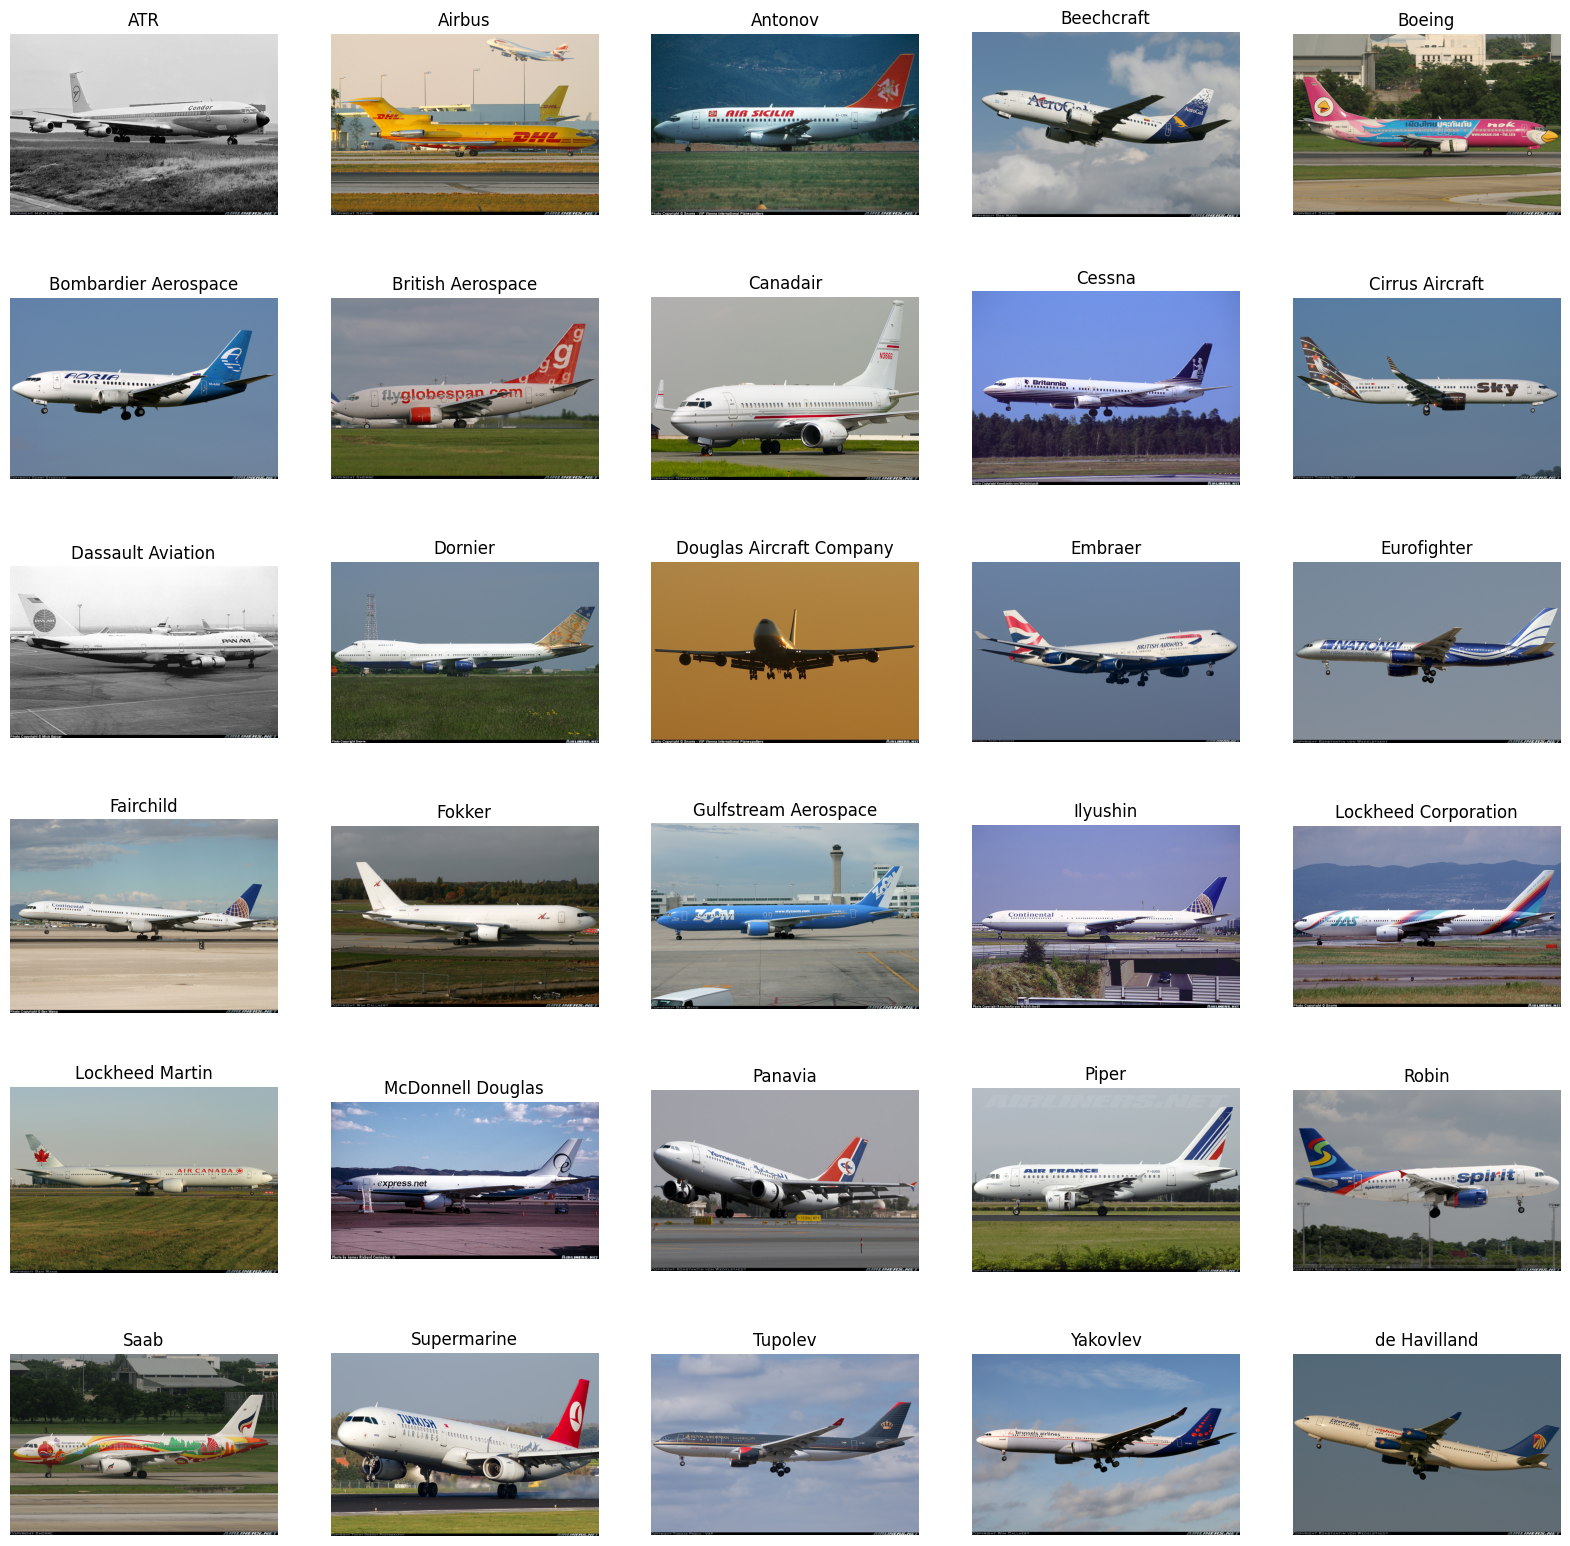

In [ ]:
# Crear un diccionario para almacenar una imagen por clase
class_images = {}

# Recorrer el dataframe de entrenamiento y seleccionar una imagen por clase
for index, row in train_df.iterrows():
    class_label = row['Labels']
    if class_label not in class_images:
        class_images[class_label] = row['filename']
    if len(class_images) == len(clases):
        break

# Mostrar una imagen por clase
plt.figure(figsize=(20, 20))
for i, (class_label, filename) in enumerate(class_images.items()):
    img_path = os.path.join(img_dir, filename)
    img = mpimg.imread(img_path)
    plt.subplot(6, 5, i + 1)
    plt.imshow(img)
    plt.title(clases[class_label])
    plt.axis('off')
plt.show()

Veamos el balanceo de las clases

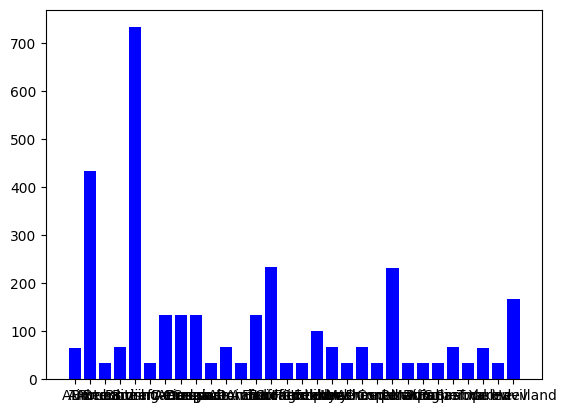

In [ ]:
plt.figure()

plt.bar(clases, np.bincount(train_labels), color='blue')

plt.show()

El gráfico no se ve muy bien pero es suficiente para darnos cuenta de que los datos no están para nada balanceados. A simple visto, esto puede ser debido a que es claro que un fabricante puede hacer referencia a más modelos que otro, por lo que fabricantes conocidos generan una ventaja significativa.

Veamos un poco mejor cuantos datos tenemos de cada uno.

In [ ]:
print("Tamaño dataset training: ", train_df.shape)
print(pd.value_counts(train_df["Manufacturer"], sort=True))

Tamaño dataset training:  (3334, 5)
Manufacturer
Boeing                      733
Airbus                      434
Embraer                     233
McDonnell Douglas           232
de Havilland                167
Canadair                    134
Cessna                      133
Douglas Aircraft Company    133
British Aerospace           133
Fokker                      100
Lockheed Corporation         68
Gulfstream Aerospace         67
Dassault Aviation            67
Beechcraft                   67
Saab                         67
Tupolev                      66
ATR                          66
Antonov                      34
Yakovlev                     34
Dornier                      34
Lockheed Martin              34
Panavia                      34
Robin                        33
Ilyushin                     33
Eurofighter                  33
Bombardier Aerospace         33
Cirrus Aircraft              33
Piper                        33
Fairchild                    33
Supermarine            

C:\Users\David\AppData\Local\Temp\ipykernel_21812\2896173630.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(train_df["Manufacturer"], sort=True))


Como los datos de training están desbalanceados, deberemos usar unos pesos que nos ayuden a que el entrenamiento no favorezca a cierto tipo de imágenes.

In [ ]:
# Obtener los labels del dataset
wlabels = train_df["Manufacturer_Label"].values
wclass_names = np.unique(wlabels)

# Calcular pesos inversamente proporcionales a la cantidad de imágenes por clase
class_weights = compute_class_weight("balanced", classes=wclass_names, y=wlabels)
class_weight_dict = dict(zip(wclass_names, class_weights))

# Mostrar los pesos de las clases
print("Pesos de las clases:", class_weight_dict)

Pesos de las clases: {np.int64(0): np.float64(0.7586776859504132), np.int64(1): np.float64(1.2691244239631336), np.int64(2): np.float64(0.7714285714285715), np.int64(3): np.float64(0.822089552238806), np.int64(4): np.float64(0.7514324693042292), np.int64(5): np.float64(16.69090909090909), np.int64(6): np.float64(0.8282706766917293), np.int64(7): np.float64(0.822089552238806), np.int64(8): np.float64(0.8282706766917293), np.int64(9): np.float64(16.69090909090909), np.int64(10): np.float64(0.822089552238806), np.int64(11): np.float64(0.7714285714285715), np.int64(12): np.float64(0.8282706766917293), np.int64(13): np.float64(0.7879828326180257), np.int64(14): np.float64(16.69090909090909), np.int64(15): np.float64(16.69090909090909), np.int64(16): np.float64(0.7868571428571428), np.int64(17): np.float64(0.822089552238806), np.int64(18): np.float64(0.8841091492776886), np.int64(19): np.float64(0.81), np.int64(20): np.float64(0.7714285714285715), np.int64(21): np.float64(0.7913793103448276)

# Modelo

In [ ]:
# Definir la arquitectura de la CNN personalizada
model = Sequential([
    # Bloques convolucionales
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Capas densas
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(len(clases), activation='sigmoid')
])

model.summary()

c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 12, 12, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 30)             │        15,390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,910,846 (18.73 MB)

 Trainable params: 4,910,846 (18.73 MB)

 Non-trainable params: 0 (0.00 B)

c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


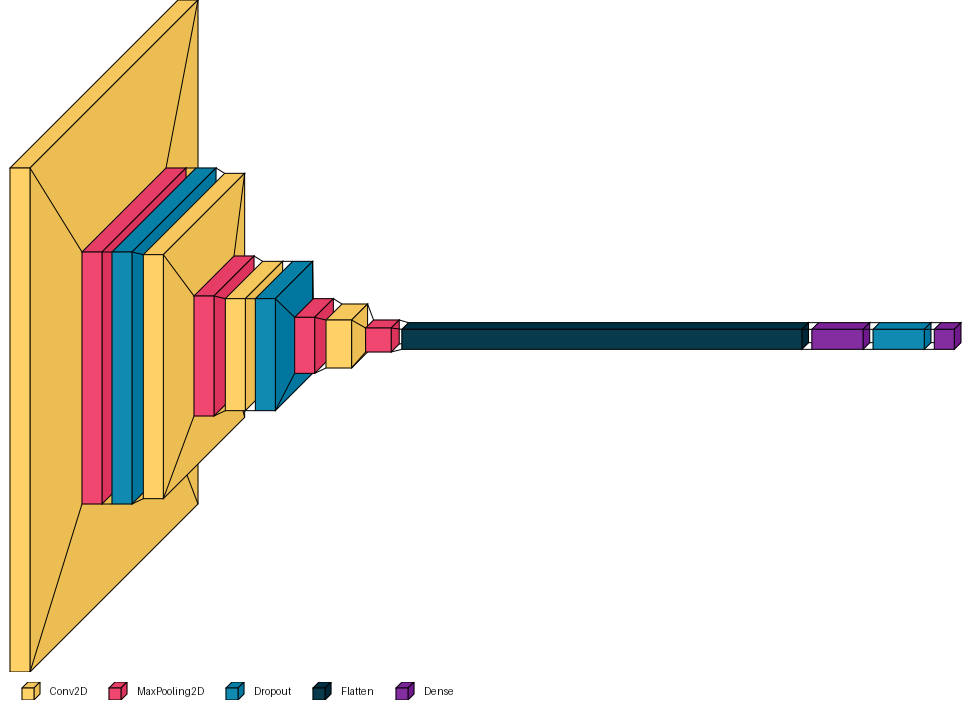

In [ ]:
visualkeras.layered_view(model, legend=True)

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 12, 12, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 30)             │        15,390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,910,846 (18.73 MB)

 Trainable params: 4,910,846 (18.73 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Crear generadores de datos para entrenamiento y validación
train_datagen = ImageDataGenerator(rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
history = model.fit(train_datagen.flow(train_images, train_labels, batch_size=48),
          epochs=25,
          validation_data=(val_images, val_labels),
          class_weight=class_weight_dict)

c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 35s 464ms/step - accuracy: 0.0564 - loss: 69.1416 - val_accuracy: 0.0159 - val_loss: 3.3164
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 29s 412ms/step - accuracy: 0.0881 - loss: 5.0408 - val_accuracy: 0.0150 - val_loss: 3.3888
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 29s 416ms/step - accuracy: 0.0704 - loss: 5.1928 - val_accuracy: 0.0177 - val_loss: 3.2719
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 29s 418ms/step - accuracy: 0.0549 - loss: 4.9304 - val_accuracy: 0.0351 - val_loss: 3.2020
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 34s 482ms/step - accuracy: 0.0508 - loss: 4.8980 - val_accuracy: 0.0789 - val_loss: 3.1949
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 31s 444ms/step - accuracy: 0.0404 - loss: 4.9342 - val_accuracy: 0.0735 - val_loss: 3.2075
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 30s 427ms/step - accuracy: 0.0536 - loss: 5.2178 - val_accuracy: 0.0222 - val_loss: 3.2186
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 29s 418ms/step - accuracy: 0.0379 - loss: 4.9549 - val_acc

Como podemos ver, a simple vista en el entrenamiento, los resultados son bastante pobres y la precisión es casi nula. Intentemos realizar el entrenamiento sin pesos (teniendo en cuenta que los resultados podrían no representar un buen indicio dada la posible preferencia a escoger una sola clase).

In [ ]:
history2 = model.fit(train_datagen.flow(train_images, train_labels, batch_size=48),
          epochs=25,
          validation_data=(val_images, val_labels))

c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 31s 420ms/step - accuracy: 0.1789 - loss: 2.9194 - val_accuracy: 0.2181 - val_loss: 2.7517
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 30s 430ms/step - accuracy: 0.2233 - loss: 2.6984 - val_accuracy: 0.2259 - val_loss: 2.7219
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 30s 423ms/step - accuracy: 0.2430 - loss: 2.6509 - val_accuracy: 0.2319 - val_loss: 2.7157
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 34s 489ms/step - accuracy: 0.2323 - loss: 2.6366 - val_accuracy: 0.2295 - val_loss: 2.6675
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 31s 436ms/step - accuracy: 0.2344 - loss: 2.6212 - val_accuracy: 0.2367 - val_loss: 2.7123
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 31s 447ms/step - accuracy: 0.2556 - loss: 2.5557 - val_accuracy: 0.2325 - val_loss: 2.6825
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 30s 427ms/step - accuracy: 0.2345 - loss: 2.5693 - val_accuracy: 0.2430 - val_loss: 2.6106
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 30s 427ms/step - accuracy: 0.2386 - loss: 2.5851 - val_accu

En este entrenamiento, a pesar de que los resultados mejoran, no es una mejora que resulta significativa, por lo que no podemos concluir nada y muy probablemente los resultados esten bastante sesgados.

## Mapeo de Características

Ahora, veamos un poco mejor que es lo que realizan algunas de las capas convolucionales que tenemos, mediante un mapeo de características.

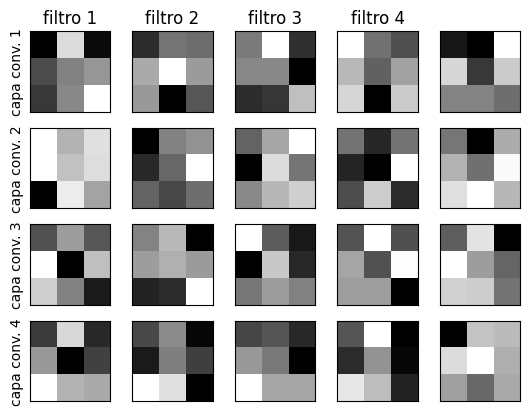

In [ ]:
# filtrar capas convolucionales
conv_layers = [layer for layer in model.layers if "conv" in layer.name ]

np.random.seed(1)

_, axes = plt.subplots(len(conv_layers), 5)

for i, layer in enumerate(conv_layers):
    axes[i,0].set_ylabel(f"capa conv. {i+1}")
    axes[0,i].set_title(f"filtro {i+1}")

    # obtener los filtros de cada capa convolucional
    filters, biases = layer.get_weights()
    # reescalar filtros para poder ser visualizados
    filters = (filters - filters.min()) / (filters.max() - filters.min())

    # obtener 4 filtros al azar para ser visualizados
    sel = np.random.randint(0, filters.shape[-1], 5)
    filters_selected = filters[:,:,:, sel]
    filters_selected = np.moveaxis(filters_selected, -1, 0)
    filters_selected = np.mean(filters_selected, axis=3, keepdims=True)
    # filters_selected = filters_selected[:,:,:,0]
    for j, filter in enumerate(filters_selected):
        # visualizar filtro
        axes[i,j].imshow(filter, cmap="gray")

        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_45']
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


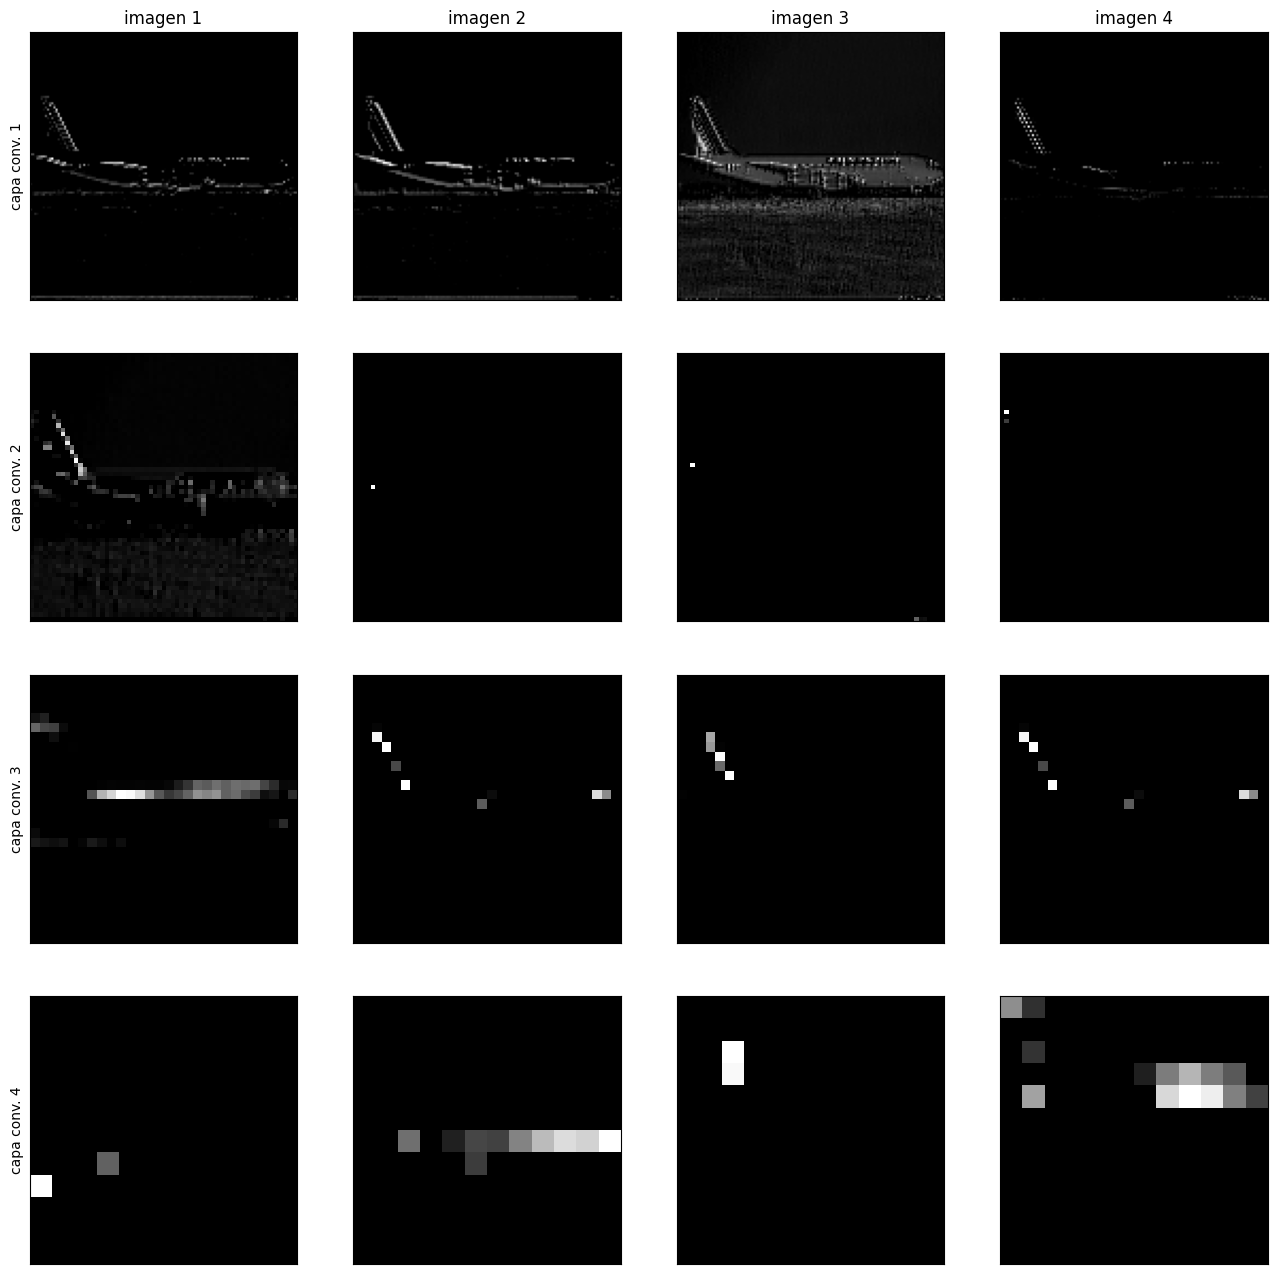

In [ ]:
_, axes = plt.subplots(len(conv_layers), 4, figsize=(16,16))

np.random.seed(3)

# modelo que nos dara la salida de cada capa convolucional
vis_model = Model(
    inputs = model.inputs,
    outputs = [ layer.output for layer in conv_layers ]
)

# aplicar el modelo hasta cada capa convolucional
feature_maps = vis_model.predict(np.expand_dims(test_images[0], axis=0))

for i, f_map in enumerate(feature_maps):
    axes[i,0].set_ylabel(f"capa conv. {i+1}")
    axes[0,i].set_title(f"imagen {i+1}")

    # filtrar imagenes resultantes sin caracteristicas extraidas
    f_map = f_map[:,:,:, np.any(f_map[0,:,:,:] > 0, axis=(0,1)) ]

    # seleccionar 4 imagenes con el filtro aplicado para mostrar
    sel = np.random.randint(0, f_map.shape[-1], 4)
    feature_map_selected = f_map[:,:,:, sel]
    feature_map_selected = feature_map_selected[0]
    feature_map_selected = np.moveaxis(feature_map_selected, -1, 0)
    for j, image in enumerate(feature_map_selected):
        # visualizar imagen
        axes[i,j].imshow(image, cmap="gray")

        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])

plt.show()

En las capas convolucionales que se están usando, se puede observar realmente una perdida de información grandiosa, lo cual analizando puede ser debido a la pérdida de calidad de la imagen cuando se estandariza su tamaño.

En este caso, en la primer capa convolucional, podemos ver una detección de bordes, ante una imagen con mejor calidad esto podría ser de ayuda para la clasificación, en temas como el diseño, los motores de los aviones y demás.

En la segunda capa convolucional se esta perdiendo demasiada información, logrando notar simplemente pocos bordes de lo que parece ser el ala del avión.

Finalmente, en la tercer y cuarta capa convolucional, se puede ver algo de información de lo que parece ser la nariz del avión.

Sin embargo, a pesar de que las capas convolucionales parecen aprender de los bordes de los aviones, podemos deducir que esta información realmente es muy general y no llega a ser de mucha colaboración en la toma de decisiones, ya que la mayoría de aviones suelen tener los mismos colores, el mismo entorno y en general, la misma forma.

## Métricas de Desempeño

Veamos ahora algunas de las métricas de desempeño obtenidas por nuestro CNN para evaluar que tan bueno es nuestro clasificador de imágenes

### Evolución de la Exactitud

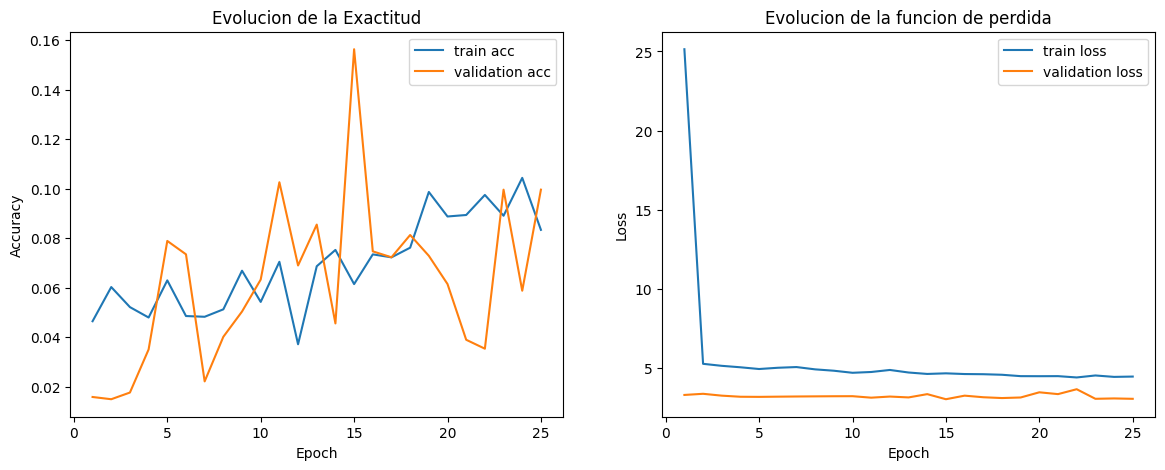

In [ ]:
# graficas de la evolucion del acurracy y loss
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

history = history.history
epochs = range(1, len(history["accuracy"]) + 1)

# plot acurracy
ax1.plot(epochs, history["accuracy"], label="train acc")
ax1.plot(epochs, history["val_accuracy"], label="validation acc")

ax1.legend()
ax1.set_title("Evolucion de la Exactitud")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")


# plot loss
ax2.plot(epochs, history["loss"], label="train loss")
ax2.plot(epochs, history["val_loss"], label="validation loss")

ax2.legend()
ax2.set_title("Evolucion de la funcion de perdida")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")

plt.show()

105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step


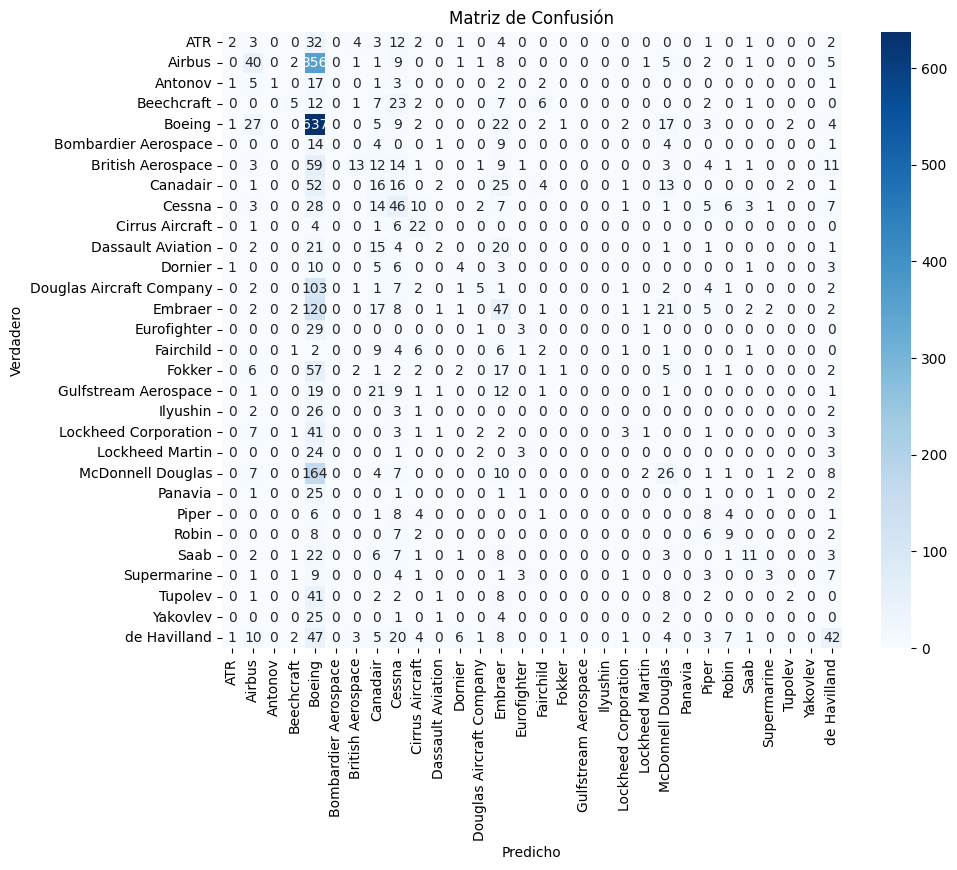

In [ ]:
y_pred_probs = model.predict(test_images)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_test_classes = test_labels  # No need to use np.argmax here

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clases,
            yticklabels=clases)
plt.title('Matriz de Confusión')
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.show()

In [ ]:
# Convertir y_test del formato codificado one-hot al formato de etiqueta
y_test_labels = test_labels

print("\nReporte de Clasificación:")
print(classification_report(y_test_labels, y_pred_classes, target_names=clases))


Reporte de Clasificación:
                          precision    recall  f1-score   support

                     ATR       0.33      0.03      0.05        67
                  Airbus       0.31      0.09      0.14       433
                 Antonov       1.00      0.03      0.06        33
              Beechcraft       0.33      0.08      0.12        66
                  Boeing       0.32      0.87      0.46       734
    Bombardier Aerospace       0.00      0.00      0.00        33
       British Aerospace       0.52      0.10      0.16       133
                Canadair       0.11      0.12      0.11       133
                  Cessna       0.19      0.34      0.24       134
         Cirrus Aircraft       0.34      0.65      0.45        34
       Dassault Aviation       0.20      0.03      0.05        67
                 Dornier       0.24      0.12      0.16        33
Douglas Aircraft Company       0.33      0.04      0.07       133
                 Embraer       0.20      0.20   

c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Como podemos ver, los resultados de las métricas nos confirman lo que ya estaba dicho anteriormente, hay generada una confusión bastante grande en lo que es el fabricante que más se repite, que son los Boeing, generando un sesgo bastante grande en este. Además, la precisión resulta ser bastante baja para lo que tenemos.

## Uso de Callbacks

Ingresemos ahora dos callbacks y veamos su impacto en nuestro modelo, estos serán EarlyStopping y ReduceLROnPlateau

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', mode = 'min', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)

Entrenemos el modelo y veamos sus resultados

In [ ]:
history3 = model.fit(train_datagen.flow(train_images, train_labels, batch_size=48),
          epochs=25,
          validation_data=(test_images, test_labels),
          callbacks=[early_stopping, reduce_lr],
          class_weight=class_weight_dict)

c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 30s 429ms/step - accuracy: 0.1654 - loss: 5.0369 - val_accuracy: 0.1236 - val_loss: 3.0824 - learning_rate: 0.0010
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 31s 447ms/step - accuracy: 0.1021 - loss: 4.8081 - val_accuracy: 0.1242 - val_loss: 3.1445 - learning_rate: 0.0010
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 29s 411ms/step - accuracy: 0.0940 - loss: 4.7982 - val_accuracy: 0.0753 - val_loss: 3.2333 - learning_rate: 0.0010
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 29s 411ms/step - accuracy: 0.0792 - loss: 4.3598 - val_accuracy: 0.1074 - val_loss: 3.1760 - learning_rate: 0.0010
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 29s 408ms/step - accuracy: 0.0898 - loss: 4.4157 - val_accuracy: 0.1167 - val_loss: 3.2235 - learning_rate: 0.0010
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 30s 425ms/step - accuracy: 0.0871 - loss: 4.7632 - val_accuracy: 0.1656 - val_loss: 3.0140 - learning_rate: 0.0010
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 29s 412ms/step - accuracy: 0.0972 - loss: 4.

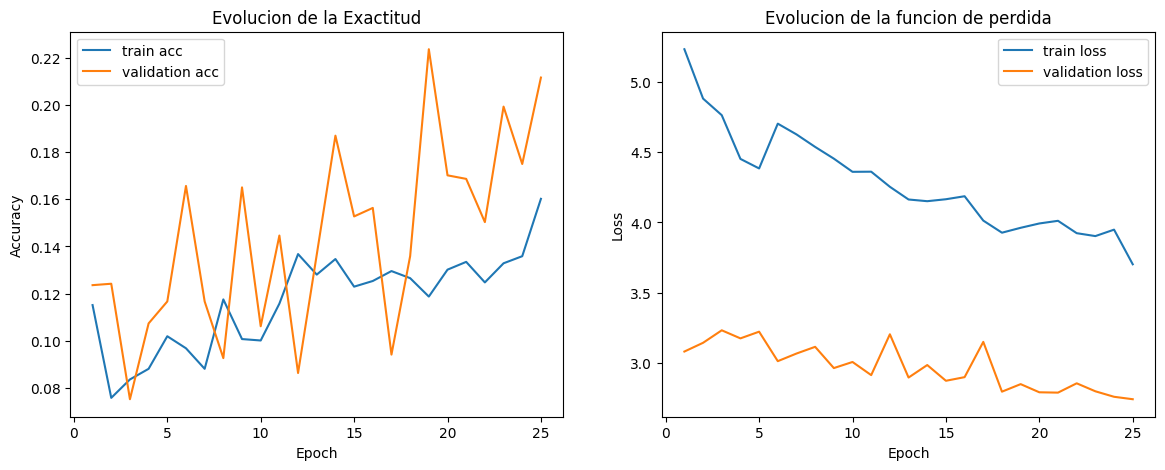

In [ ]:
# graficas de la evolucion del acurracy y loss
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

history3 = history3.history
epochs3 = range(1, len(history["accuracy"]) + 1)

# plot acurracy
ax1.plot(epochs3, history3["accuracy"], label="train acc")
ax1.plot(epochs3, history3["val_accuracy"], label="validation acc")

ax1.legend()
ax1.set_title("Evolucion de la Exactitud")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")


# plot loss
ax2.plot(epochs3, history3["loss"], label="train loss")
ax2.plot(epochs3, history3["val_loss"], label="validation loss")

ax2.legend()
ax2.set_title("Evolucion de la funcion de perdida")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")

plt.show()

105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step


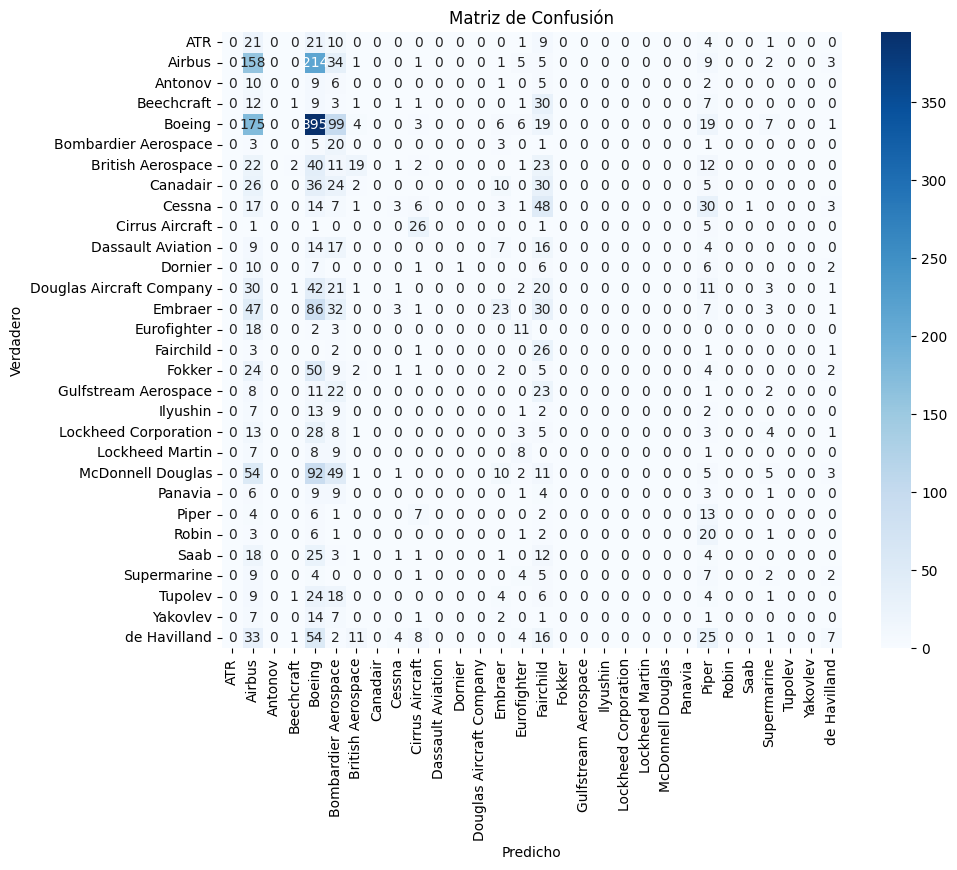

In [ ]:
y_pred_probs3 = model.predict(test_images)
y_pred_classes3 = np.argmax(y_pred_probs3, axis=1)
y_test_classes3 = test_labels  # No need to use np.argmax here

plt.figure(figsize=(10, 8))
cm3 = confusion_matrix(y_test_classes3, y_pred_classes3)
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues',
            xticklabels=clases,
            yticklabels=clases)
plt.title('Matriz de Confusión')
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.show()

In [ ]:
# Convertir y_test del formato codificado one-hot al formato de etiqueta
y_test_labels3 = test_labels

print("\nReporte de Clasificación:")
print(classification_report(y_test_labels3, y_pred_classes3, target_names=clases))


Reporte de Clasificación:
                          precision    recall  f1-score   support

                     ATR       0.00      0.00      0.00        67
                  Airbus       0.21      0.36      0.26       433
                 Antonov       0.00      0.00      0.00        33
              Beechcraft       0.17      0.02      0.03        66
                  Boeing       0.32      0.54      0.40       734
    Bombardier Aerospace       0.05      0.61      0.09        33
       British Aerospace       0.42      0.14      0.21       133
                Canadair       0.00      0.00      0.00       133
                  Cessna       0.19      0.02      0.04       134
         Cirrus Aircraft       0.43      0.76      0.55        34
       Dassault Aviation       0.00      0.00      0.00        67
                 Dornier       1.00      0.03      0.06        33
Douglas Aircraft Company       0.00      0.00      0.00       133
                 Embraer       0.32      0.10   

c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Como podemos ver, realmente las callbacks que usamos, una de ellas no logró aplicarse, dada una parametrización específica, sin embargo, se esperaría que si el entrenamiento se realiza con más número de "epochs", este callback nos colabore para detener la ejecución del entrenamiento ante una mejora baja. Ahora bien, la otra callback, ReduceLROnPlateau, a pesar de que hizo un entrenamiento un poco más inestable, vemos que generaba que la tendencia del entrenamiento fuese siempre a mejorar con sus resultados, lo cual resulta bastante beneficioso al ir ajustando la tasa de aprendizaje.

## Modelo Preentrenado

Probemos ahora a usar un modelo preentrenado con el fin de ver si esto nos ayuda en nuestra clasificación.

In [ ]:
# Cargar el modelo ResNet50 preentrenado sin la capa superior
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Añadir nuevas capas superiores
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(clases), activation='softmax')(x)

# Crear el modelo final
modelf = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
modelf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

modelf.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 134, 134,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 64, 64,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 64, 64,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 66, 66,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 32, 32,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 32, 32,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 32, 32,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 32, 32,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_3_c

 Total params: 25,716,638 (98.10 MB)

 Trainable params: 2,128,926 (8.12 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Entrenar el modelo
historyf = modelf.fit(
    train_datagen.flow(train_images, train_labels, batch_size=48),
    validation_data=(val_images, val_labels),
    class_weight=class_weight_dict,
    callbacks=[early_stopping, reduce_lr],
    epochs=25
)

c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.1716 - loss: 4.9116 - val_accuracy: 0.2244 - val_loss: 3.0341 - learning_rate: 0.0010
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.1984 - loss: 3.3457 - val_accuracy: 0.2562 - val_loss: 2.5955 - learning_rate: 0.0010
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.2478 - loss: 3.0385 - val_accuracy: 0.2166 - val_loss: 2.8558 - learning_rate: 0.0010
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.2568 - loss: 2.7391 - val_accuracy: 0.2532 - val_loss: 2.6496 - learning_rate: 0.0010
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.2733 - loss: 2.7078 - val_accuracy: 0.3033 - val_loss: 2.3806 - learning_rate: 0.0010
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.2711 - loss: 2.5543 - val_accuracy: 0.3048 - val_loss: 2.3620 - learning_rate: 0.0010
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.3051 - loss: 2.4629 - val_acc

### Métricas de Desempeño

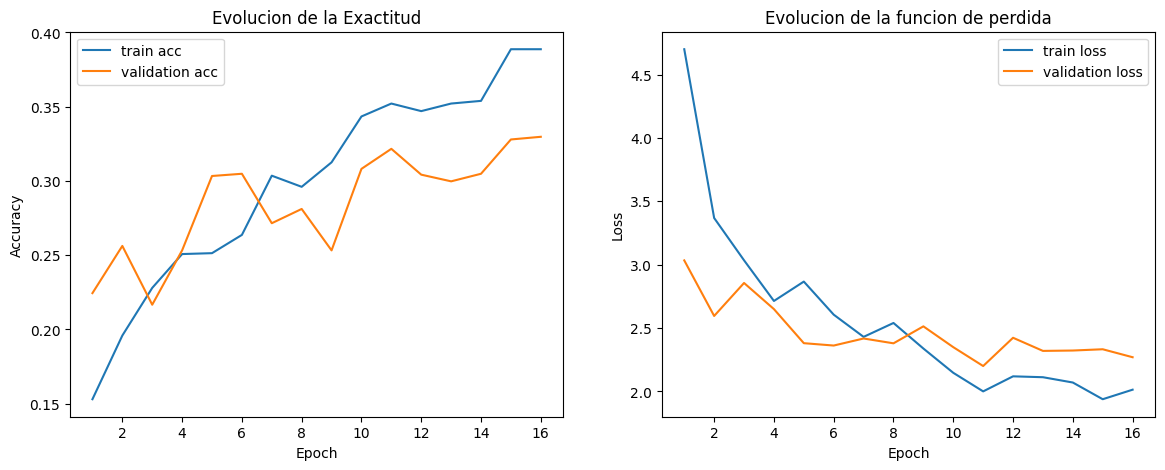

In [ ]:
# graficas de la evolucion del acurracy y loss
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

epochsf = range(1, len(historyf["accuracy"]) + 1)

# plot acurracy
ax1.plot(epochsf, historyf["accuracy"], label="train acc")
ax1.plot(epochsf, historyf["val_accuracy"], label="validation acc")

ax1.legend()
ax1.set_title("Evolucion de la Exactitud")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")


# plot loss
ax2.plot(epochsf, historyf["loss"], label="train loss")
ax2.plot(epochsf, historyf["val_loss"], label="validation loss")

ax2.legend()
ax2.set_title("Evolucion de la funcion de perdida")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")

plt.show()

105/105 ━━━━━━━━━━━━━━━━━━━━ 65s 598ms/step


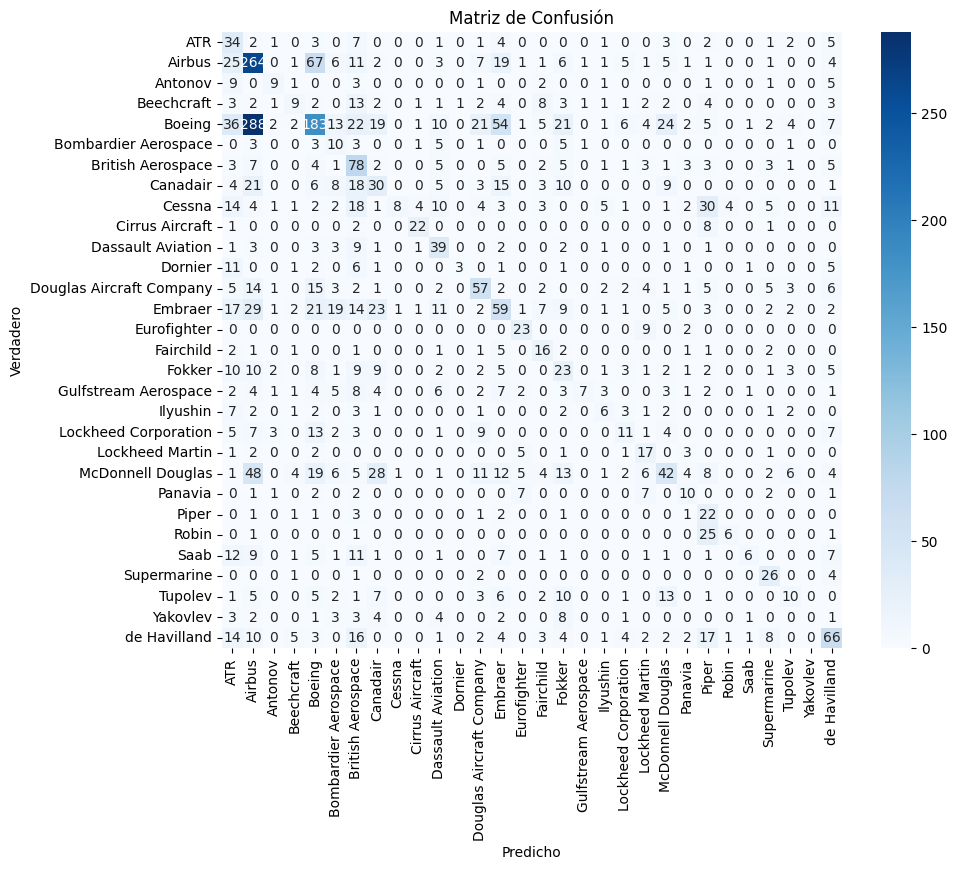

In [ ]:
y_pred_probsf = modelf.predict(test_images)
y_pred_classesf = np.argmax(y_pred_probsf, axis=1)
y_test_classesf = test_labels  # No need to use np.argmax here

plt.figure(figsize=(10, 8))
cmf = confusion_matrix(y_test_classesf, y_pred_classesf)
sns.heatmap(cmf, annot=True, fmt='d', cmap='Blues',
            xticklabels=clases,
            yticklabels=clases)
plt.title('Matriz de Confusión')
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.show()

In [ ]:
# Convertir y_test del formato codificado one-hot al formato de etiqueta
y_test_labelsf = test_labels

print("\nReporte de Clasificación:")
print(classification_report(y_test_labelsf, y_pred_classesf, target_names=clases))


Reporte de Clasificación:
                          precision    recall  f1-score   support

                     ATR       0.15      0.51      0.24        67
                  Airbus       0.36      0.61      0.45       433
                 Antonov       0.39      0.27      0.32        33
              Beechcraft       0.28      0.14      0.18        66
                  Boeing       0.49      0.25      0.33       734
    Bombardier Aerospace       0.12      0.30      0.17        33
       British Aerospace       0.29      0.59      0.38       133
                Canadair       0.22      0.23      0.22       133
                  Cessna       0.80      0.06      0.11       134
         Cirrus Aircraft       0.71      0.65      0.68        34
       Dassault Aviation       0.36      0.58      0.44        67
                 Dornier       0.75      0.09      0.16        33
Douglas Aircraft Company       0.43      0.43      0.43       133
                 Embraer       0.27      0.25   

c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Como podemos evidenciar, sin duda alguna usar la red neuronal preentrenada fue de gran ayuda en los resultados obtenidos, casi que duplicando el desempeño de las métricas a comparación con el modelo anterior. Más aún, aplicó el callback de EarlyStopping, para lo cual podemos notar una mejoría en los tiempos de ejecución, a pesar de que cada epoch se demoraba casi 4 veces más en comparación con el otro. Sin duda alguna, resulta en una gran ventaja, pues podemos hacer uso de modelos mucho más complejos para nuestros objetivos, sin embargo, queda en consideración que dada la morfología, el entorno y la colorimetría de la gran mayoría de aviones, esta clasificación fuera tan volátil.